<a href="https://colab.research.google.com/github/sathsaranir1996/Rice-Seed-Identification-System/blob/main/ReserchProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crop and select the relevant part of the image

In [ ]:
# Import required libraries(OpenCV, NumPy, Pandas, Matplotlib, TenserFlow)
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from PIL import Image

# Reading the image
image = cv2.imread('drive/My Drive/images/dikwee/DSC_7997.jpeg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

# Crop the center of the image using TenserFlow (Fraction = 90%)
cropped_img = tf.image.central_crop(image, central_fraction=0.9).numpy()

plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")
plt.show()

# Resizing the image
resized_img = cv2.resize(cropped_img, (600, 400))

plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.title("Resized Image")
plt.show()

# Converting the image to grayscale
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap="gray")
plt.title("Gray Image")
plt.show()

# Applying thresholding (Otsu's thresholding)
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh_img)
plt.title("Image after Thresholding")
plt.show()

# Morphological operations
kernel = np.ones((3,3),np.uint8)
morph_img = cv2.erode(thresh_img,kernel,iterations = 1)
morph_img = cv2.dilate(morph_img,kernel,iterations = 1)

# Feature extraction
canny_edges = cv2.Canny(morph_img, threshold1=30, threshold2=100)
contours, hierarchy = cv2.findContours(canny_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(canny_edges, cmap="gray")
plt.title("Image after Canny Edge Detection")
plt.show()

# Get the count of contours
count = len(contours)
print('Count of contours:', count)
print('----------------------------')

# Initialize variables
total_area = 0
total_perimeter = 0
areas = []
perimeters = []
seed_type = 'Dikwee'

# Create list to hold cropped images
# cropped_images = []

# Loop through the contours and compute their area and perimeter
for contour in contours:

    # Get the minimum area rectangle that bounds the contour
    rect = cv2.minAreaRect(contour)

    # Extract the length and width of the rectangle
    length, width = rect[1]

    # Print the length and width
    print('Length:', length)
    print('Width:', width)

    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    areas.append(area)
    perimeters.append(perimeter)

    print('Area:', area)
    print('Perimeter:', perimeter)

    total_area += area
    total_perimeter += perimeter

    # Creating multiple masks using cv2 boundingrect
    x,y,w,h = cv2.boundingRect(contour)
    masked_img = cv2.rectangle(resized_img,(x,y),(x+w,y+h),(0,255,0),2)

    # Compute the mean color value of the contour
    mask = np.zeros_like(gray_img)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    mean_color = cv2.mean(gray_img, mask=mask)
    print('Contour color:', mean_color)

    contour_shape = contour.shape
    print('Shape:', contour_shape, '\n')


    # img = np.ones([600,600, 3], dtype=np.uint8) # arbitrary image

    # plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
    
    # plt.show()

    # cropped_img = img[rect[1]:(rect[1]+rect[3]), rect[0]:(rect[0]+rect[2])] # crop the image to the desired rectangle

    # # Crop the image using the bounding rectangle coordinates
    # cropped = image[y:y+h, x:x+w]
    
    # # Append cropped image to list
    # cropped_images.append(cropped)

# Convert the area and perimeter lists to a pandas DataFrame
df = pd.DataFrame({'Area': areas, 'Perimeter': perimeters, 'Class' : seed_type})

# Save the DataFrame to a CSV file
df.to_csv('area_perimeter.csv', index=False)

plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
plt.title("Image after creating multiple masks")
plt.show()

# Compute the average area and perimeter
avg_area = total_area / len(contours)
avg_perimeter = total_perimeter / len(contours)

print('----------------------------------')
print('Average Area:', avg_area)
print('Average Perimeter:', avg_perimeter)




drive/My Drive/images/dikwee/DSC_7997.jpeg


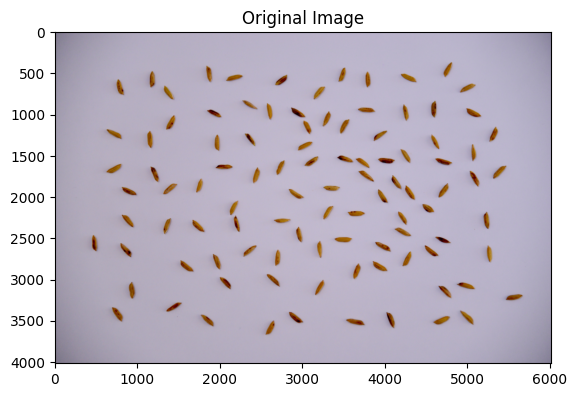

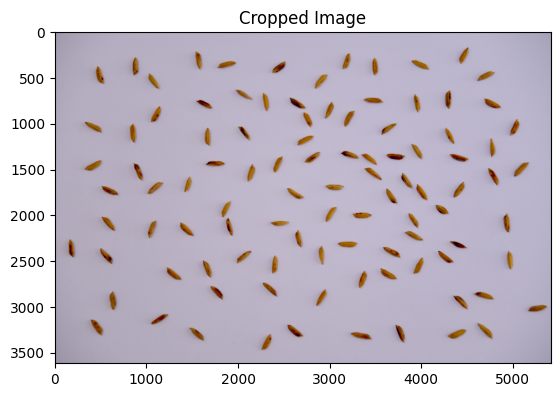

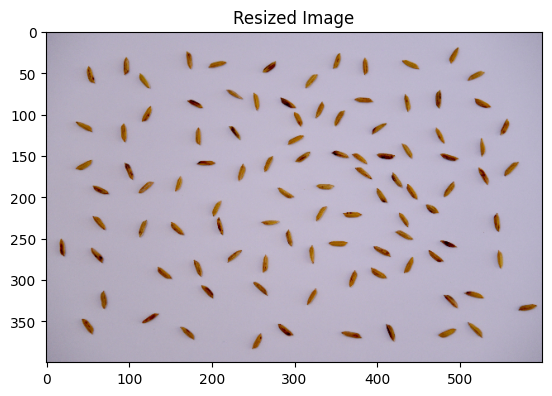

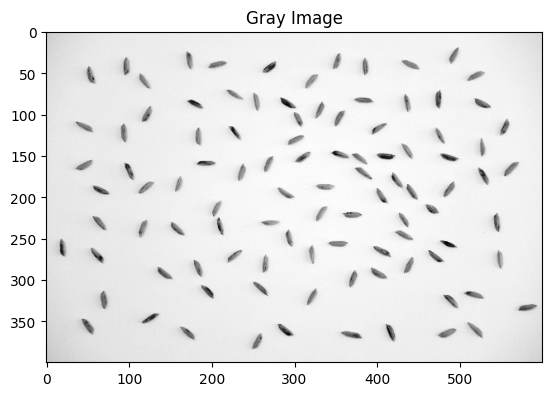

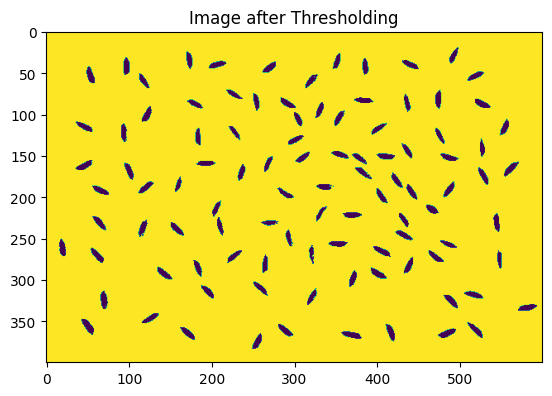

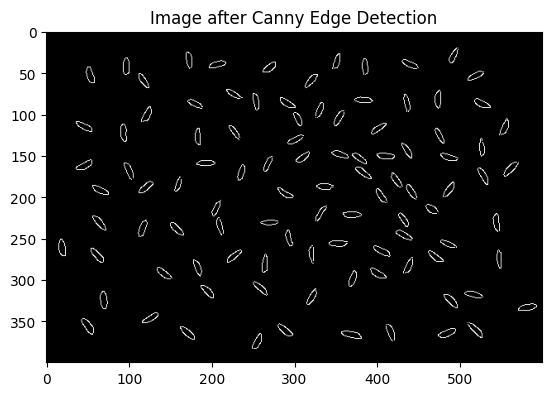

Count of contours: 113
----------------------------
Length: 7.60263204574585
Width: 20.571826934814453
Area: 5.0
Perimeter: 93.25483310222626


ValueError: ignored

In [6]:
# Import required libraries(OpenCV, NumPy, Pandas, Matplotlib, TenserFlow)
import os
import cv2
import glob
import webcolors
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image

folder_path = 'drive/My Drive/images/dikwee'

# Get all files in the folder
files = glob.glob(os.path.join(folder_path, '*'))

# Filter out non-image files
image_files = [file for file in files if file.endswith(('.png', '.jpg', '.jpeg', '.gif'))]

# Load the images
images = []
for image_file in image_files:
    with open(image_file, 'rb') as f:
        images.append(f.read())

        # Reading the image
        image = cv2.imread(image_file)

        print(image_file)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.show()

        # Crop the center of the image using TenserFlow (Fraction = 90%)
        cropped_img = tf.image.central_crop(image, central_fraction=0.9).numpy()

        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.title("Cropped Image")
        plt.show()

        # Resizing the image
        resized_img = cv2.resize(cropped_img, (600, 400))

        plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
        plt.title("Resized Image")
        plt.show()

        # Converting the image to grayscale
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

        plt.imshow(gray_img, cmap="gray")
        plt.title("Gray Image")
        plt.show()

        # Applying thresholding (Otsu's thresholding)
        ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        plt.imshow(thresh_img)
        plt.title("Image after Thresholding")
        plt.show()

        # Morphological operations
        kernel = np.ones((3,3),np.uint8)
        morph_img = cv2.erode(thresh_img,kernel,iterations = 1)
        morph_img = cv2.dilate(morph_img,kernel,iterations = 1)

        # Feature extraction
        canny_edges = cv2.Canny(morph_img, threshold1=30, threshold2=100)
        contours, hierarchy = cv2.findContours(canny_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        plt.imshow(canny_edges, cmap="gray")
        plt.title("Image after Canny Edge Detection")
        plt.show()

        # Get the count of contours
        count = len(contours)
        print('Count of contours:', count)
        print('----------------------------')

        # Initialize variables
        total_area = 0
        total_perimeter = 0
        areas = []
        perimeters = []
        seed_type = 'Dikwee'

        # Create list to hold cropped images
        # cropped_images = []

        # Loop through the contours and compute their area and perimeter
        for contour in contours:

            # Get the minimum area rectangle that bounds the contour
            rect = cv2.minAreaRect(contour)

            # Extract the length and width of the rectangle
            length, width = rect[1]

            # Print the length and width
            print('Length:', length)
            print('Width:', width)

            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)

            areas.append(area)
            perimeters.append(perimeter)

            print('Area:', area)
            print('Perimeter:', perimeter)

            total_area += area
            total_perimeter += perimeter

            # Creating multiple masks using cv2 boundingrect
            x,y,w,h = cv2.boundingRect(contour)
            masked_img = cv2.rectangle(resized_img,(x,y),(x+w,y+h),(0,255,0),2)

            # Compute the mean color value of the contour
            mask = np.zeros_like(gray_img)
            cv2.drawContours(mask, [contour], 0, 255, -1)
            mean_color = cv2.mean(gray_img, mask=mask)
            print('Contour color:', mean_color)

            contour_shape = contour.shape
            print('Shape:', contour_shape, '\n')

        # Convert the area and perimeter lists to a pandas DataFrame
        df = pd.DataFrame({'Area': areas, 'Perimeter': perimeters, 'Class' : seed_type})

        # Save the DataFrame to a CSV file
        df.to_csv('area_perimeter.csv', index=False)

        plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
        plt.title("Image after creating multiple masks")
        plt.show()

        # Compute the average area and perimeter
        avg_area = total_area / len(contours)
        avg_perimeter = total_perimeter / len(contours)

        print('----------------------------------')
        print('Average Area:', avg_area)
        print('Average Perimeter:', avg_perimeter)
        print('----------------------------------')


print(f"Loaded {len(images)} images")


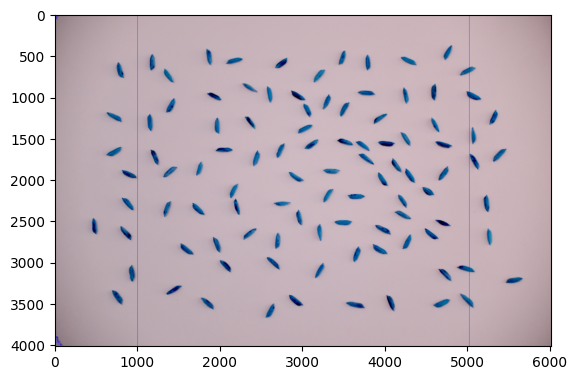

In [15]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('drive/My Drive/images/dikwee/DSC_7997.jpeg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through all the contours in the image
for contour in contours:

    # Get the minimum area rectangle that bounds the contour
    rect = cv2.minAreaRect(contour)

    # Extract the angle of rotation from the rectangle
    angle = rect[2]

    # Rotate the contour by the angle of rotation
    (h, w) = image.shape[:2]
    center = rect[0]
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_contour = cv2.transform(contour, M)

    # Convert the rotated contour to integer values
    rotated_contour = np.int0(rotated_contour)

    # Draw the rotated contour on the original image
    cv2.drawContours(image, [rotated_contour], 0, (0, 0, 255), 2)

# Show the corrected contours on the image
plt.imshow(image)


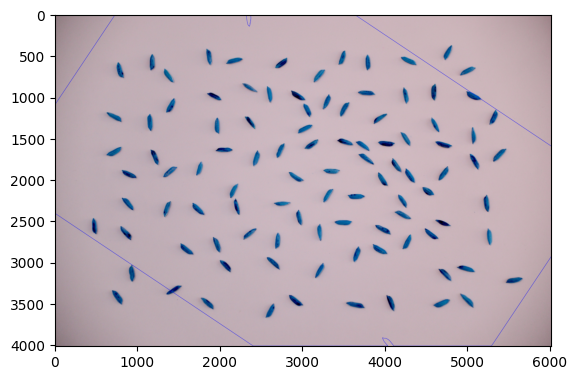

In [17]:
 import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('drive/My Drive/images/dikwee/DSC_7997.jpeg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate the orientation angle for each contour
angles = []
for contour in contours:
    # Get the minimum area rectangle that bounds the contour
    rect = cv2.minAreaRect(contour)
    # Extract the angle of rotation from the rectangle
    angle = rect[2]
    angles.append(angle)

# Calculate the average orientation angle for all contours
avg_angle = np.mean(angles)

# Rotate all contours by the average orientation angle
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -avg_angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

# Find contours in the rotated image
gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the rotated contours on the original image
for contour in contours:
    cv2.drawContours(image, [contour], 0, (0, 0, 255), 2)

# Show the result
plt.imshow(image)


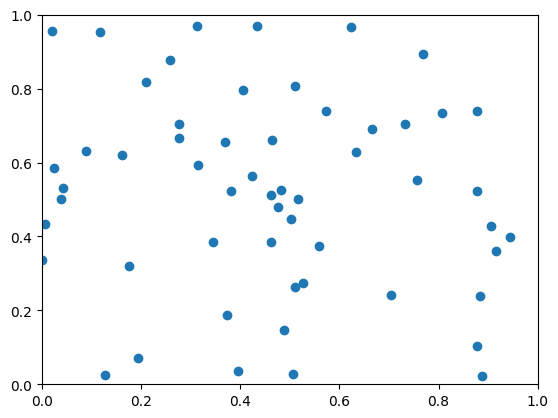

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create an example array with shape (56, 1, 2)
array = np.random.rand(56, 1, 2)

# Reshape the array to 2D shape (56, 2)
points = array.reshape((56, 2))

# Plot the points as scatter points
plt.scatter(points[:, 0], points[:, 1])

# Set the x and y axis limits
plt.xlim(0, 1)
plt.ylim(0, 1)

# Show the plot
plt.show()


In [ ]:
import cv2

# Load the image
image = cv2.imread('drive/My Drive/images/dikwee/DSC_7997.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect the edges using Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Find the contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through each contour and compute its color
for contour in contours:
    # Compute the mean color value of the contour
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    mean_color = cv2.mean(gray, mask=mask)
    print('Contour color:', mean_color)


In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('drive/My Drive/images/dikwee/DSC_7997.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours in the image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop over the contours and compute the color of each contour
for cnt in contours:
    # Mask the image to obtain only the pixels within the contour
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [cnt], 0, 255, -1)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    
    # Compute the mean color of the pixels within the contour
    mean_color = cv2.mean(masked_image, mask=mask)
    print('Contour color:', mean_color)


In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('drive/My Drive/images/dikwee/DSC_7997.jpeg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the minimum area rectangle that bounds the contour
rect = cv2.minAreaRect(contours[0])

# Extract the angle of rotation from the rectangle
angle = rect[2]

# Rotate the contour by the angle of rotation
(h, w) = image.shape[:2]
center = rect[0]
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_contour = cv2.transform(contours[0], M)

# Convert the rotated contour to integer values
rotated_contour = np.int0(rotated_contour)

# Draw the rotated contour on the original image
cv2.drawContours(image, [rotated_contour], 0, (0, 0, 255), 2)

# Show the corrected contour on the image
cv2.imshow("Rotated Contour", image)
cv2.waitKey(0)


In [ ]:
# extract color codes from an image and save them to a CSV file

import cv2
import pandas as pd

# Load the image
image = cv2.imread('drive/My Drive/images/dikwee/DSC_7997.jpeg')

# Reshape the image to a 2D array
image_reshaped = image.reshape(-1, 3)

# Get the unique color codes
color_codes = set(tuple(row) for row in image_reshaped)

# Convert the color codes to a pandas DataFrame
df = pd.DataFrame(list(color_codes), columns=['Red', 'Green', 'Blue'])

# Save the DataFrame to a CSV file
df.to_csv('color_codes.csv', index=False)


Model Implementation

In [ ]:
# Support Vector Machines (SVM)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the CSV file
# data = pd.read_csv('/content/area_perimeter.csv')
data = pd.read_csv('/content/drive/MyDrive/data_set.csv')

# Split the data into features (X) and target (y)
X = data[['Area', 'Perimeter']]
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an SVM classifier with a linear kernel
svm = SVC(kernel='linear')

# Train the SVM classifier
svm.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)



Accuracy: 0.9565217391304348


In [ ]:
# Random Forest

import numpy as np
import pandas as pd
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.applications.vgg16 import VGG16

# Load the dataset of rice seed images
data = pd.read_csv('/content/area_perimeter.csv')
images = data['Image'].values
labels = data['Label'].values

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features from the images using the VGG16 model
features = []
for image in images:
    img = cv2.imread(image)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    feature = model.predict(img)
    features.append(feature.flatten())

# Encode the labels using LabelEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Test the Random Forest model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


In [ ]:
# Loop through the list of cropped images and save them
for i, cropped in enumerate(cropped_images):
    cv2.imwrite(f"cropped_image_{i}.jpg", cropped)


KeyboardInterrupt: ignored

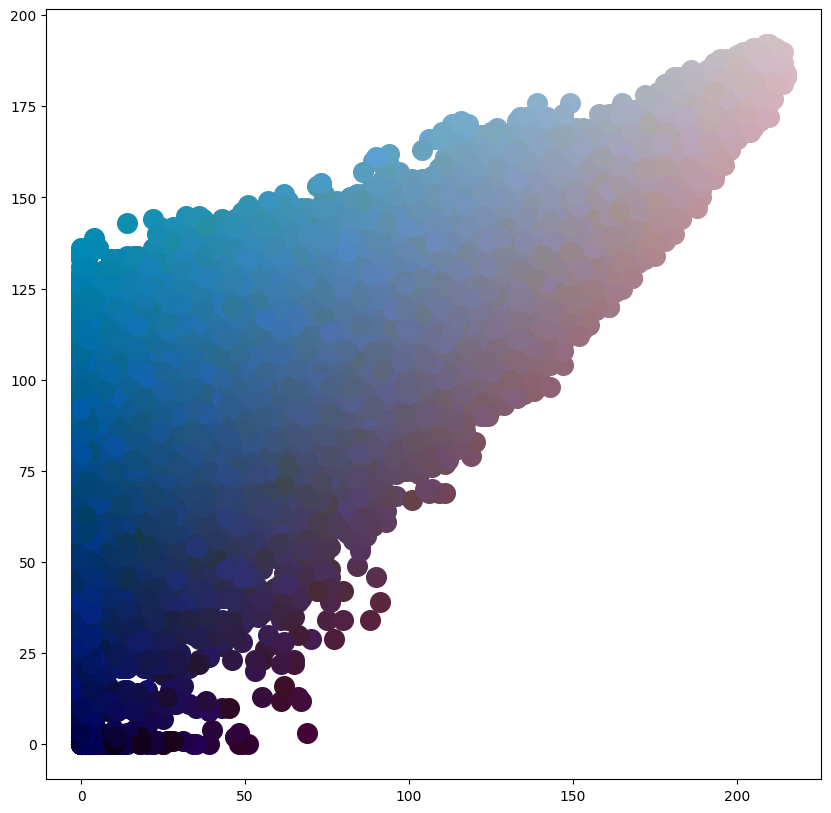

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread('drive/My Drive/images/dikwee/DSC_7997.jpeg')

# Reshape the image to a 2D array
image_reshaped = image.reshape(-1, 3)

# Get the unique color codes
color_codes = set(tuple(row) for row in image_reshaped)

# Plot the color codes as a scatter plot
fig, ax = plt.subplots(figsize=(10, 10))
for code in color_codes:
    r, g, b = code
    ax.scatter(r, g, c=[(r/255, g/255, b/255)], s=200)

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_aspect('equal')
plt.show()


In [ ]:
from PIL import Image
import numpy as np

# Open Paddington and make sure he is RGB - not palette
im = Image.open('drive/My Drive/images/hondarawalu/DSC_7987.jpeg').convert('RGB')

# Make into Numpy array
na = np.array(im)

# Arrange all pixels into a tall column of 3 RGB values and find unique rows (colours)
colours, counts = np.unique(na.reshape(-1,3), axis=0, return_counts=1)

print(colours)
print(counts)

[[  0   0   0]
 [  0   0   2]
 [  0   0  12]
 ...
 [220 153 101]
 [220 171 139]
 [222 151 107]]
[6 3 1 ... 1 1 1]


In [ ]:
# Import required libraries(OpenCV, NumPy, Matplotlib, TenserFlow)
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from PIL import Image

# Reading the image
image = cv2.imread('drive/My Drive/images/hondarawalu/DSC_7987.jpeg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

# Crop the center of the image using TenserFlow (Fraction = 90%)
cropped_img = tf.image.central_crop(image, central_fraction=0.9).numpy()

plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")
plt.show()

# Resizing the image
resized_img = cv2.resize(cropped_img, (600, 400))

plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.title("Resized Image")
plt.show()

# Converting the image to grayscale
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap="gray")
plt.title("Gray Image")
plt.show()

# Applying thresholding (Otsu's thresholding)
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh_img)
plt.title("Image after Thresholding")
plt.show()

# Morphological operations
kernel = np.ones((3,3),np.uint8)
morph_img = cv2.erode(thresh_img,kernel,iterations = 1)
morph_img = cv2.dilate(morph_img,kernel,iterations = 1)

# Feature extraction
canny_edges = cv2.Canny(morph_img, threshold1=30, threshold2=100)
contours, hierarchy = cv2.findContours(canny_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(canny_edges, cmap="gray")
plt.title("Image after Canny Edge Detection")
plt.show()

# Get the count of contours
count = len(contours)
print('Count of contours:', count)
print('----------------------------')
# Initialize variables for total area and perimeter
total_area = 0
total_perimeter = 0

# Loop through the contours and compute their area and perimeter
for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    print('Area:', area)
    print('Perimeter:', perimeter)

    total_area += area
    total_perimeter += perimeter

    # Creating multiple masks using cv2 boundingrect
    x,y,w,h = cv2.boundingRect(contour)
    masked_img = cv2.rectangle(resized_img,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
plt.title("Image after creating multiple masks")
plt.show()

# Compute the average area and perimeter
avg_area = total_area / len(contours)
avg_perimeter = total_perimeter / len(contours)

print('----------------------------------')
print('Average Area:', avg_area)
print('Average Perimeter:', avg_perimeter)




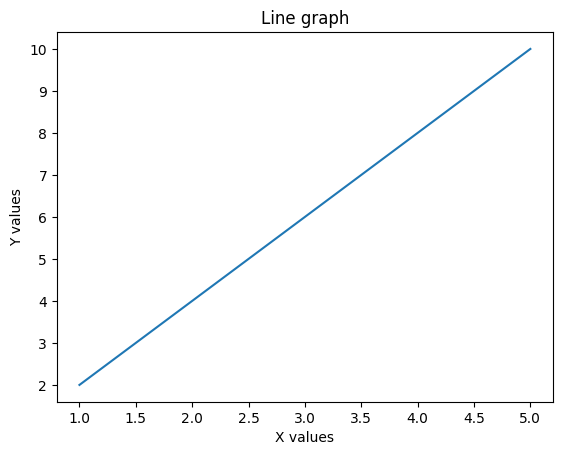

In [ ]:
import matplotlib.pyplot as plt

# Define the x and y values
x_values = [1, 2, 3, 4, 5]
y_values = [2, 4, 6, 8, 10]

# Plot the data as a line graph
plt.plot(x_values, y_values)

# Add labels and title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Line graph')

# Show the plot
plt.show()


TypeError: ignored

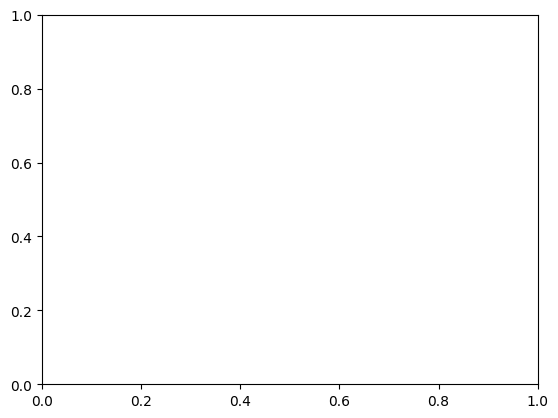

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('drive/My Drive/images/hondarawalu/DSC_7987.jpeg')

# Get the height and width of the image
h, w = img.shape[:2]

# Define the number of pixels you want to select
num_pixels = 1000

# Generate random indices for the pixels
indices = np.random.choice(h*w, num_pixels, replace=False)

# Reshape the indices into a 2D array of (num_pixels, 1)
indices = np.reshape(indices, (num_pixels, 1))

# Convert the indices to 2D coordinates (y, x)
y_coords = indices // w
x_coords = indices % w

# Get the pixel values for the randomly selected pixels
pixels = img[y_coords, x_coords]

# Convert the pixel values to grayscale
gray_pixels = cv2.cvtColor(pixels, cv2.COLOR_BGR2GRAY)

# Create a hexagonal bin plot of the grayscale pixel values
plt.hexbin(x_coords, y_coords, C=gray_pixels, gridsize=20, cmap='viridis')

# Add labels and title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Hexagonal bin plot')

# Show the plot
plt.show()


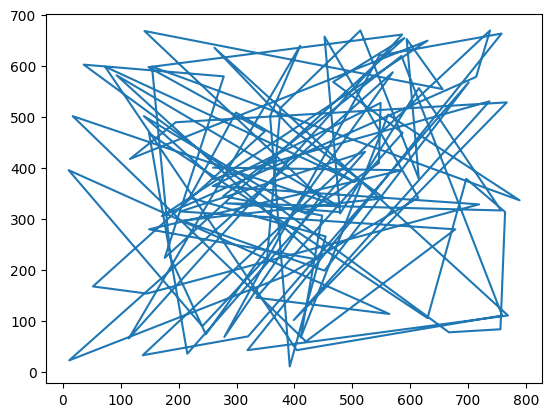

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('drive/My Drive/images/dikwee/lime1.jpeg')

# Get the height and width of the image
h, w = img.shape[:2]

# Define the number of pixels you want to select
num_pixels = 100

# Generate random indices for the pixels
indices = np.random.choice(h*w, num_pixels, replace=False)

# Reshape the indices into a 2D array of (num_pixels, 1)
indices = np.reshape(indices, (num_pixels, 1))

# Convert the indices to 2D coordinates (y, x)
y_coords = indices // w
x_coords = indices % w

# Get the pixel values for the randomly selected pixels
pixels = img[y_coords, x_coords]

plt.plot(x_coords, y_coords)

# Display the selected pixels
# print(pixels)


In [ ]:
import cv2
import numpy as np
from collections import Counter

# Read image
image = cv2.imread('drive/My Drive/images/dikwee/DSC_7997.jpeg')

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize image for faster processing (optional)
image = cv2.resize(image, (250, 250))

# Calculate color histogram
hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])

# Flatten histogram to a 1D array
hist_flat = np.reshape(hist, -1)

# Get the ten most common colors
colors = Counter(hist_flat).most_common(10)

# Print the ten most common colors
for color in colors:
    print(color)


(0.0, 466)
(1.0, 5)
(10.0, 3)
(3.0, 3)
(24.0, 2)
(22.0, 1)
(82.0, 1)
(102.0, 1)
(228.0, 1)
(76.0, 1)


ValueError: ignored

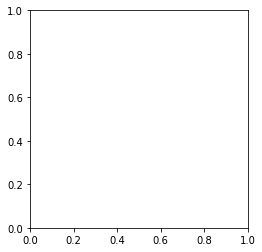

In [ ]:
import cv2
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# Read image
image = cv2.imread('drive/My Drive/images/dikwee/DSC_7997.jpeg')

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculate color histogram
hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])

# Flatten histogram to a 1D array
hist_flat = np.reshape(hist, -1)

# Get the ten most common colors
colors = Counter(hist_flat).most_common(10)

# Extract the RGB values of the top ten colors
rgb_values = [color[0] for color in colors]

# Normalize the RGB values to [0, 1] range
rgb_normalized = [color / 255 for color in rgb_values]

# Extract the counts of the top ten colors
counts = [color[1] for color in colors]

# Create a pie chart of the top ten colors
plt.pie(counts, labels=rgb_normalized, colors=rgb_normalized)
plt.show()


Image Segmentation

In [ ]:
# import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read the input color image
img = cv2.imread('drive/My Drive/images/dikwee/DSC_7997.jpeg')

# split the Blue, Green and Red color channels
blue,green,red = cv2.split(img)

# display three channels
plt.imshow(blue)
plt.title("Blue Channel")
plt.show()

plt.imshow(green)
plt.title("Green Channel")
plt.show()

plt.imshow(red)
plt.title("Red Channel")
plt.show()

# Apply Gaussian blur with a kernel size of 5x5 to remove noise
blurred_image = cv2.GaussianBlur(red, (5, 5), 0)

plt.imshow(blurred_image)
plt.title("Blurred Image")
plt.show()

# Apply Otsu's thresholding on image
ret,thresh_img = cv2.threshold(blurred_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(thresh_img)
plt.title("Image after Thresholding")
plt.show()

# Find the contours of the thresholded image
contours, _ = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Get the count of contours
count = len(contours)

print('Count of contours:', count)

# Loop through the contours and compute their area and perimeter
# for contour in contours:
#     area = cv2.contourArea(contour)
#     perimeter = cv2.arcLength(contour, True)

#     print('Area:', area)
#     print('Perimeter:', perimeter)


In [ ]:
import cv2

# Load the image
img = cv2.imread('drive/My Drive/images/dikwee/DSC_7997.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to the grayscale image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find the contours of the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Get the count of contours
count = len(contours)

print('Count of contours:', count)

# Loop through the contours and compute their area and perimeter
for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    print('Area:', area)
    print('Perimeter:', perimeter)


In [ ]:
import cv2
  
  
#Store the threshold image generated by the previous script
image = cv2.imread('drive/My Drive/images/dikwee/DSC_7997.jpeg')

#Store the original image
original_image = cv2.imread('drive/My Drive/images/dikwee/DSC_7997.jpeg')

#Convert the thrsholded image to binary
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#threshold one more time for better results.
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

#find the contours
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

image_copy = image.copy()

#loop over every contour, calculate its area and filter the correct area
#Apply the bounding box on the contours that passes the area criteria
#Store every object seperately.
for i in range(0,len(contours)):

        area=cv2.contourArea(contours[i])
        print(area)
        if( area<20000 and area>5000):
                x,y,w,h= cv2.boundingRect(contours[i])
                cropped_img=original_image[y:y+h, x:x+w]
                img_name= str(i)+".jpg"
                cv2.imwrite(img_name,cropped_img)

In [ ]:
import numpy as np
import cv2

mask = np.zeros([600,600], dtype=np.uint8)
mask[200:500,200:500] = 255                 # set some values to 255 to represent an actual mask
rect = cv2.boundingRect(mask)               # function that computes the rectangle of interest
print(rect)

img = np.ones([600,600, 3], dtype=np.uint8) # arbitrary image
cropped_img = img[rect[1]:(rect[1]+rect[3]), rect[0]:(rect[0]+rect[2])] # crop the image to the desired rectangle 

(200, 200, 300, 300)


In [ ]:
from PIL import Image

# Open the image file
image = Image.open('drive/My Drive/images/dikwee/DSC_7997.jpeg')

# Rotate the image 90 degrees clockwise
rotated_image = image.rotate(90)

# Save the rotated image
rotated_image.save('rotated_example.jpg')

# Rotate the image by a specific angle
angle = 45
rotated_image = image.rotate(angle)

# Save the rotated image
rotated_image.save('rotated_example.jpg')
